In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.base import model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
df = pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Gender,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,...,Poisonings,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,Self-harm,Interpersonal violence,Collective violence and legal intervention
0,Afghanistan,2019,Male,63.29,NaN,0.003,4.454469,0.050986,0.000000,0.000321,...,0.057880,0.620751,0.151339,0.801665,1.545577,0.067079,2.008284,0.904954,2.595521,12.843526
1,Afghanistan,2019,Female,63.16,NaN,0.022,5.384610,0.043190,0.001424,0.004201,...,0.325711,0.284562,0.196666,0.194389,0.056229,0.067360,1.233210,0.667653,0.621160,12.776039
2,Afghanistan,2015,Male,61.04,22.5,0.002,6.109258,0.056666,0.000000,0.000277,...,3.980983,0.056828,0.570412,0.151665,0.769096,1.382456,0.286633,0.768236,2.553344,16.771404
3,Afghanistan,2015,Female,62.35,24.0,0.014,7.384937,0.047379,0.001201,0.003568,...,0.310311,0.322669,0.183147,0.251741,0.052141,0.172981,1.203843,0.597401,0.576237,7.570893
4,Afghanistan,2010,Male,59.60,22.1,0.006,5.652315,0.051922,0.000000,0.000243,...,0.087785,0.697883,0.235376,1.370172,1.611014,0.219533,2.513913,0.692336,2.233730,5.684718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Zimbabwe,2015,Female,60.96,25.3,9.290,0.457023,0.055791,0.004304,0.012291,...,0.250199,0.191028,0.479394,0.297724,0.081625,0.006214,0.802611,0.914977,0.431202,0.006617
1460,Zimbabwe,2010,Male,49.58,22.0,1.470,0.711036,0.089442,0.000000,0.001461,...,0.334334,0.282539,0.429810,0.650420,0.246179,0.000000,1.148517,1.587510,1.430862,0.007299
1461,Zimbabwe,2010,Female,53.21,25.1,7.150,0.464125,0.065319,0.006029,0.017061,...,0.253757,0.210764,0.536211,0.297708,0.087766,0.000000,0.940847,1.143750,0.394385,0.003225
1462,Zimbabwe,2000,Male,45.15,21.7,0.880,2.530362,0.066511,0.000000,0.000808,...,0.160531,0.165435,0.189768,0.277759,0.122977,0.041924,0.553637,0.822588,1.329588,0.033451


In [82]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,Unnamed: 0,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,...,2000,2010,2015,2019,Africa,Asia,Europe,North America,Oceania,South America
0,245,83.27,26.400000,4.630,0.043437,1.011156e-03,0.000000,0.000000,0,0,...,0,1,0,0,0,0,0,1,0,0
1,772,67.49,26.600000,24.600,0.190677,9.450000e-07,0.000000,0.000000,0,0,...,0,1,0,0,0,0,1,0,0,0
2,517,64.53,24.600000,6.220,4.154896,1.492187e-01,0.005937,0.016498,0,0,...,0,1,0,0,1,0,0,0,0,0
3,449,70.52,20.566667,3.660,9.671605,6.639447e-01,0.020908,0.055490,0,0,...,0,0,0,1,1,0,0,0,0,0
4,15,76.92,25.000000,2.860,0.007437,4.267620e-04,0.000076,0.000220,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1051,75.93,30.000000,1.860,0.001555,1.068461e-03,0.000014,0.000038,0,0,...,0,0,1,0,0,1,0,0,0,0
995,1132,70.39,27.500000,0.000,0.697774,2.421293e-02,0.000000,0.000125,0,0,...,0,1,0,0,0,1,0,0,0,0
996,1382,75.49,26.400000,21.600,0.271061,1.465759e-02,0.000000,0.000971,0,0,...,1,0,0,0,0,0,1,0,0,0
997,1442,65.41,23.500000,0.012,1.233193,9.046115e-02,0.000000,0.000174,0,0,...,0,0,1,0,0,1,0,0,0,0


# work done for group's feature reduction -> in shared notebook
malig_neo = 'Malignant neoplasms'
malig_neo_list = ['Mouth and oropharynx cancers',
 'Oesophagus cancer',
 'Stomach cancer',
 'Colon and rectum cancers',
 'Liver cancer',
 'Pancreas cancer',
 'Trachea, bronchus, lung cancers',
 'Malignant skin melanoma',
 'Non-melanoma skin cancer',
 'Breast cancer',
 'Cervix uteri cancer',
 'Corpus uteri cancer',
 'Ovary cancer',
 'Prostate cancer',
 'Testicular cancer',
 'Kidney cancer',
 'Bladder cancer',
 'Brain and nervous system cancers',
 'Gallbladder and biliary tract cancer',
 'Larynx cancer',
 'Thyroid cancer',
 'Hodgkin lymphoma',
 'Non-Hodgkin lymphoma',
 'Multiple myeloma',
 'Leukaemia']

neuro_cond = 'Neurological conditions'
neuro_cond_list = [ 'Alzheimer disease and other dementias',
 'Parkinson disease',
 'Epilepsy',
 'Multiple sclerosis',
 'Migraine',
 'Non-migraine headache',
 'Other neurological conditions'
]

unint_inj = 'Unintentional injuries'
unint_inj_list = ['Road injury',
 'Poisonings',
 'Falls',
 'Fire, heat and hot substances',
 'Drowning',
 'Exposure to mechanical forces',
 'Natural disasters',
 'Other unintentional injuries',
]

int_inj = 'Intentional injuries'
int_inj_list = ['Self-harm',
 'Interpersonal violence',
 'Collective violence and legal intervention',
]

In [ ]:
def new_cat(df, col_name, col_list):
    df[col_name] = df[col_list].sum(axis=1)
    df.drop(columns = col_list)

In [83]:
train.columns.values.tolist()

['Unnamed: 0',
 'Life Expectancy at birth',
 'BMI',
 'Alcohol',
 'Tuberculosis',
 'Syphilis',
 'Chlamydia',
 'Gonorrhoea',
 'Trichomoniasis',
 'Genital herpes',
 'Other STDs',
 'HIV/AIDS',
 'Diarrhoeal diseases',
 'Whooping cough',
 'Diphtheria',
 'Measles',
 'Tetanus',
 'Meningitis',
 'Encephalitis',
 'Acute hepatitis A',
 'Acute hepatitis B',
 'Acute hepatitis C',
 'Acute hepatitis E',
 'Malaria',
 'African Trypanosomiasis',
 'Chagas disease',
 'Schistosomiasis',
 'Leishmaniasis',
 'lymphatic filariasis',
 'Onchocerciasis',
 'Cysticercosis',
 'Echinococcosis',
 'Dengue',
 'Trachoma',
 'Yellow fever',
 'Rabies',
 'Ascariasis',
 'Trichuriasis',
 'Hookworm disease',
 'Food-bourne trematodes',
 'Leprosy',
 'Lower respiratory infections',
 'Upper respiratory infections',
 'Otitis media',
 'Preterm birth complications',
 'Birth asphyxia and birth trauma',
 'Neonatal sepsis and infections',
 'Other neonatal conditions',
 'Protein-energy malnutrition',
 'Iodine deficiency',
 'Vitamin A defic

In [84]:
#clean unnamed column
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)
train

,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,...,2000,2010,2015,2019,Africa,Asia,Europe,North America,Oceania,South America
0,83.27,26.400000,4.630,0.043437,1.011156e-03,0.000000,0.000000,0,0,0.012987,...,0,1,0,0,0,0,0,1,0,0
1,67.49,26.600000,24.600,0.190677,9.450000e-07,0.000000,0.000000,0,0,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,64.53,24.600000,6.220,4.154896,1.492187e-01,0.005937,0.016498,0,0,0.013680,...,0,1,0,0,1,0,0,0,0,0
3,70.52,20.566667,3.660,9.671605,6.639447e-01,0.020908,0.055490,0,0,0.043410,...,0,0,0,1,1,0,0,0,0,0
4,76.92,25.000000,2.860,0.007437,4.267620e-04,0.000076,0.000220,0,0,0.000095,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,75.93,30.000000,1.860,0.001555,1.068461e-03,0.000014,0.000038,0,0,0.000026,...,0,0,1,0,0,1,0,0,0,0
995,70.39,27.500000,0.000,0.697774,2.421293e-02,0.000000,0.000125,0,0,0.000249,...,0,1,0,0,0,1,0,0,0,0
996,75.49,26.400000,21.600,0.271061,1.465759e-02,0.000000,0.000971,0,0,0.000975,...,1,0,0,0,0,0,1,0,0,0
997,65.41,23.500000,0.012,1.233193,9.046115e-02,0.000000,0.000174,0,0,0.000472,...,0,0,1,0,0,1,0,0,0,0


In [85]:
train

,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,...,2000,2010,2015,2019,Africa,Asia,Europe,North America,Oceania,South America
0,83.27,26.400000,4.630,0.043437,1.011156e-03,0.000000,0.000000,0,0,0.012987,...,0,1,0,0,0,0,0,1,0,0
1,67.49,26.600000,24.600,0.190677,9.450000e-07,0.000000,0.000000,0,0,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,64.53,24.600000,6.220,4.154896,1.492187e-01,0.005937,0.016498,0,0,0.013680,...,0,1,0,0,1,0,0,0,0,0
3,70.52,20.566667,3.660,9.671605,6.639447e-01,0.020908,0.055490,0,0,0.043410,...,0,0,0,1,1,0,0,0,0,0
4,76.92,25.000000,2.860,0.007437,4.267620e-04,0.000076,0.000220,0,0,0.000095,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,75.93,30.000000,1.860,0.001555,1.068461e-03,0.000014,0.000038,0,0,0.000026,...,0,0,1,0,0,1,0,0,0,0
995,70.39,27.500000,0.000,0.697774,2.421293e-02,0.000000,0.000125,0,0,0.000249,...,0,1,0,0,0,1,0,0,0,0
996,75.49,26.400000,21.600,0.271061,1.465759e-02,0.000000,0.000971,0,0,0.000975,...,1,0,0,0,0,0,1,0,0,0
997,65.41,23.500000,0.012,1.233193,9.046115e-02,0.000000,0.000174,0,0,0.000472,...,0,0,1,0,0,1,0,0,0,0


In [86]:
#clean special characters
col = []
for i in train.columns:
    train = train.replace('-','_')
    i = i.replace('(','_')
    i = i.replace(')','_')
    col.append(i)
train.columns = col
test.columns = col
train

,Life Expectancy at birth,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,...,2000,2010,2015,2019,Africa,Asia,Europe,North America,Oceania,South America
0,83.27,26.400000,4.630,0.043437,1.011156e-03,0.000000,0.000000,0,0,0.012987,...,0,1,0,0,0,0,0,1,0,0
1,67.49,26.600000,24.600,0.190677,9.450000e-07,0.000000,0.000000,0,0,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,64.53,24.600000,6.220,4.154896,1.492187e-01,0.005937,0.016498,0,0,0.013680,...,0,1,0,0,1,0,0,0,0,0
3,70.52,20.566667,3.660,9.671605,6.639447e-01,0.020908,0.055490,0,0,0.043410,...,0,0,0,1,1,0,0,0,0,0
4,76.92,25.000000,2.860,0.007437,4.267620e-04,0.000076,0.000220,0,0,0.000095,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,75.93,30.000000,1.860,0.001555,1.068461e-03,0.000014,0.000038,0,0,0.000026,...,0,0,1,0,0,1,0,0,0,0
995,70.39,27.500000,0.000,0.697774,2.421293e-02,0.000000,0.000125,0,0,0.000249,...,0,1,0,0,0,1,0,0,0,0
996,75.49,26.400000,21.600,0.271061,1.465759e-02,0.000000,0.000971,0,0,0.000975,...,1,0,0,0,0,0,1,0,0,0
997,65.41,23.500000,0.012,1.233193,9.046115e-02,0.000000,0.000174,0,0,0.000472,...,0,0,1,0,0,1,0,0,0,0


In [87]:
y_train = train['Life Expectancy at birth']
X_train = train.drop(['Life Expectancy at birth'], axis=1)
y_test = test['Life Expectancy at birth']
X_test = test.drop(['Life Expectancy at birth'], axis=1)
X_train

,BMI,Alcohol,Tuberculosis,Syphilis,Chlamydia,Gonorrhoea,Trichomoniasis,Genital herpes,Other STDs,HIV/AIDS,...,2000,2010,2015,2019,Africa,Asia,Europe,North America,Oceania,South America
0,26.400000,4.630,0.043437,1.011156e-03,0.000000,0.000000,0,0,0.012987,0.074908,...,0,1,0,0,0,0,0,1,0,0
1,26.600000,24.600,0.190677,9.450000e-07,0.000000,0.000000,0,0,0.000000,0.017226,...,0,1,0,0,0,0,1,0,0,0
2,24.600000,6.220,4.154896,1.492187e-01,0.005937,0.016498,0,0,0.013680,9.468000,...,0,1,0,0,1,0,0,0,0,0
3,20.566667,3.660,9.671605,6.639447e-01,0.020908,0.055490,0,0,0.043410,6.500422,...,0,0,0,1,1,0,0,0,0,0
4,25.000000,2.860,0.007437,4.267620e-04,0.000076,0.000220,0,0,0.000095,0.000000,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,30.000000,1.860,0.001555,1.068461e-03,0.000014,0.000038,0,0,0.000026,0.000000,...,0,0,1,0,0,1,0,0,0,0
995,27.500000,0.000,0.697774,2.421293e-02,0.000000,0.000125,0,0,0.000249,0.056000,...,0,1,0,0,0,1,0,0,0,0
996,26.400000,21.600,0.271061,1.465759e-02,0.000000,0.000971,0,0,0.000975,0.158480,...,1,0,0,0,0,0,1,0,0,0
997,23.500000,0.012,1.233193,9.046115e-02,0.000000,0.000174,0,0,0.000472,0.235000,...,0,0,1,0,0,1,0,0,0,0


In [88]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# get importance
importance = model.coef_

# summarize feature importance
for i, v in enumerate(importance):
    print("Feature: {}, Score: {}".format(X_train.columns[i], v))

Feature: BMI, Score: 0.8664644471396484
Feature: Alcohol, Score: -0.10987401605795441
Feature: Tuberculosis, Score: 0.1322556041602955
Feature: Syphilis, Score: 6.150954726286195
Feature: Chlamydia, Score: 79.45705047420488
Feature: Gonorrhoea, Score: -71.61030636382065
Feature: Trichomoniasis, Score: -6.153283838017387e-08
Feature: Genital herpes, Score: -1.3680556294470847e-06
Feature: Other STDs, Score: 1.4034883108692346
Feature: HIV/AIDS, Score: -0.16218340838402057
Feature: Diarrhoeal diseases, Score: -0.09849638072132905
Feature: Whooping cough, Score: -0.03242156550073805
Feature: Diphtheria, Score: 10.849108395232626
Feature: Measles, Score: -0.36669700989583376
Feature: Tetanus, Score: 2.912292133512651
Feature: Meningitis, Score: -0.10381096534919809
Feature: Encephalitis, Score: 0.7457563157626481
Feature: Acute hepatitis A, Score: 3.6065823685758662
Feature: Acute hepatitis B, Score: -9.220840590351624
Feature: Acute hepatitis C, Score: -4.707125905184391
Feature: Acute he

In [90]:
def create_bar_plot(feature_importances, X_train):
    """
    Create a bar plot of features against their corresponding feature importance score.
    """
    x_indices = [_ for _ in range(len(feature_importances))]
    plt.figure(figsize=(15, 5))
    plt.bar(x_indices, feature_importances, color="blue")
    plt.xticks(x_indices, X_train.columns, rotation='vertical', fontsize=7)
    plt.xlabel("Feature", fontsize=18)
    plt.ylabel("Importance Score", fontsize=18)
    plt.title("Feature Importance Scores", fontsize=18)
    plt.show()

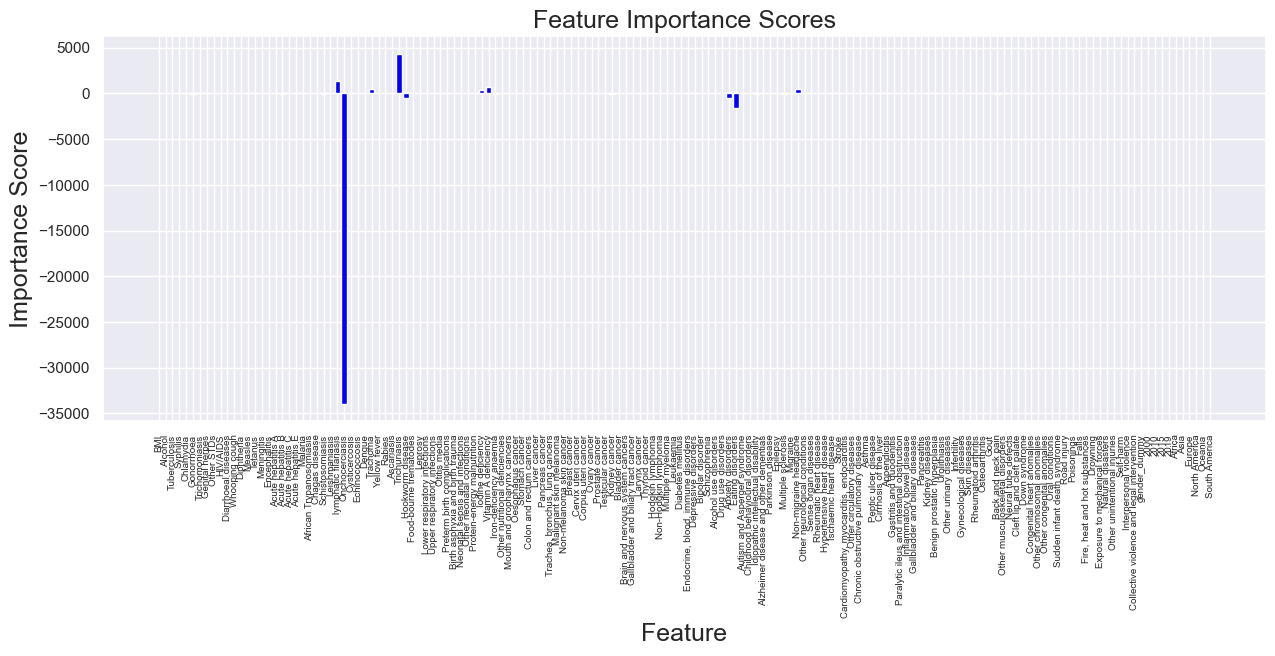

In [91]:
create_bar_plot(importance, X_train)

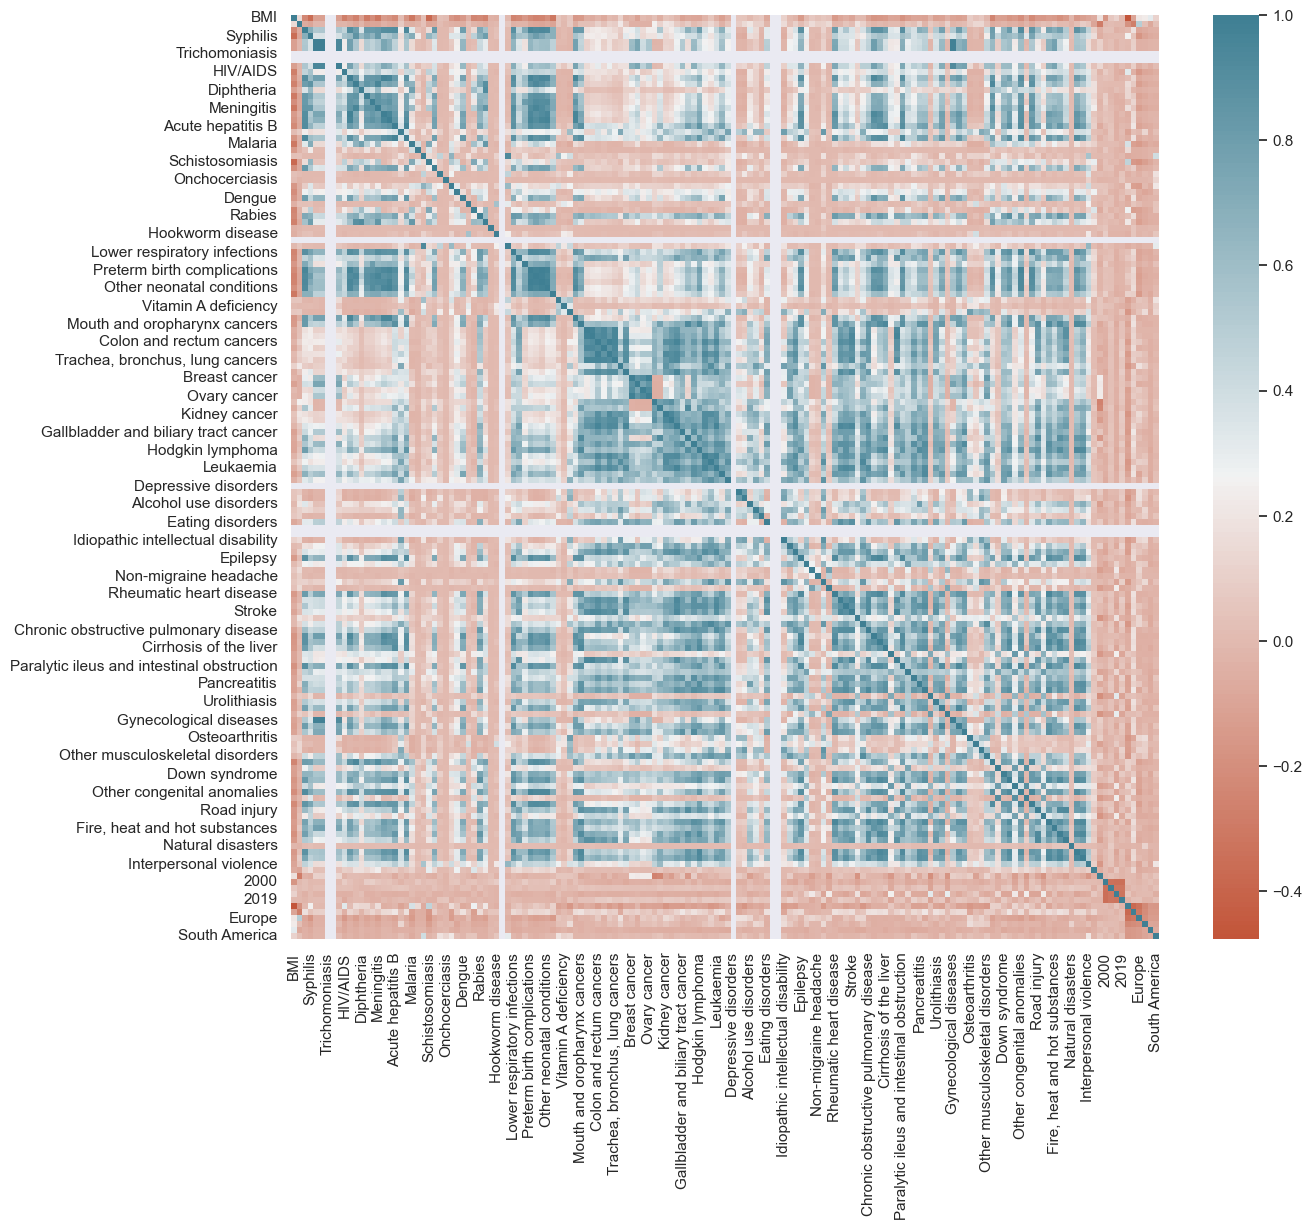

In [92]:
plt.figure(figsize=(14, 12))
cor = X_train.corr()
sns.heatmap(cor, annot=False, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

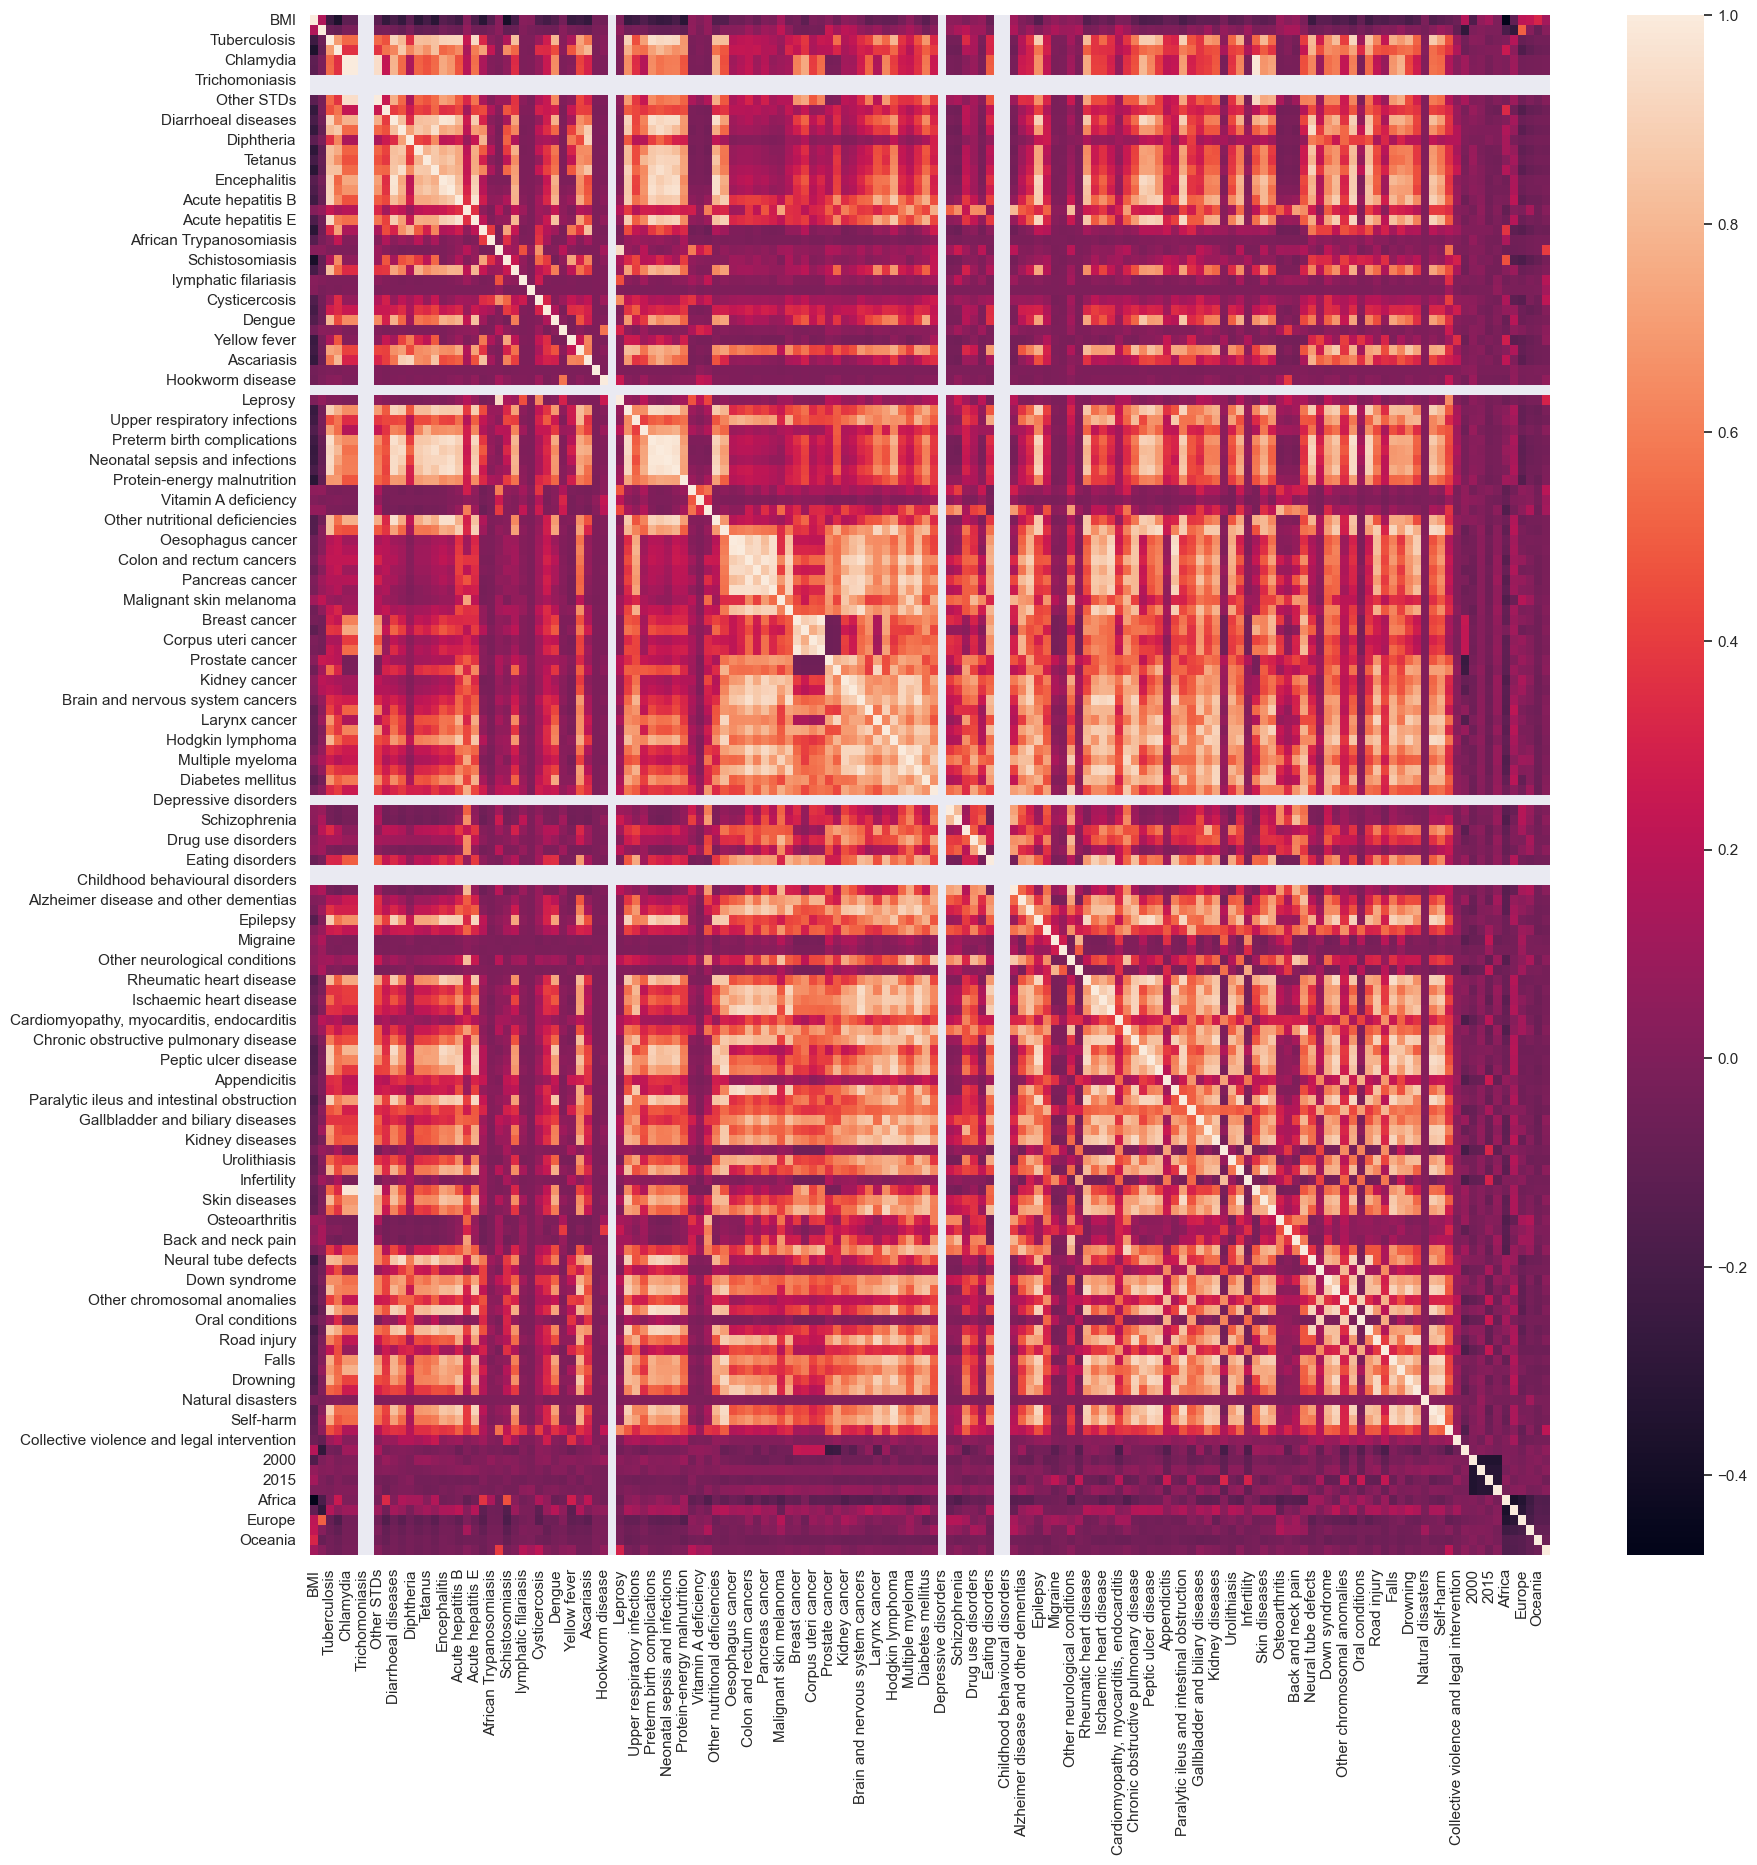

In [93]:
sns.heatmap(X_train[X_train.columns].corr(), annot=False)
sns.set(rc={'figure.figsize':(20,20)})

In [94]:
def show_ranked_feature_importance_list(scores, data):
    """
    Prints the features ranked by their corresponding importance score.
    """
    lst = list(zip(data.columns, scores))
    ranked_lst = sorted(lst, key=lambda t: t[1], reverse=True)
    return pd.DataFrame(ranked_lst, columns=["Feature", "Importance Score"])

In [95]:
show_ranked_feature_importance_list(importance, X_train)

,Feature,Importance Score
0,Trichuriasis,4352.374340
1,lymphatic filariasis,1344.229652
2,Vitamin A deficiency,738.304794
3,Non-migraine headache,504.128783
4,Trachoma,454.345434
...,...,...
149,Gonorrhoea,-71.610306
150,Anxiety disorders,-452.963416
151,Hookworm disease,-477.220513
152,Eating disorders,-1567.075733


In [96]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [97]:
X_col = X_train.columns.values.tolist()
X_VIF = pd.DataFrame(VIF(train, X_col))
X_VIF

/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/shannonzhong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,0
BMI,3.230957
Alcohol,2.336670
Tuberculosis,129.471205
Syphilis,41.067691
Chlamydia,5507.682203
...,...
Asia,inf
Europe,inf
North America,inf
Oceania,inf


In [98]:
from tabulate import tabulate 

print(tabulate(X_VIF, showindex=True, headers='keys', tablefmt='psql'))

+--------------------------------------------+------------+
|                                            |          0 |
|--------------------------------------------+------------|
| BMI                                        |    3.23096 |
| Alcohol                                    |    2.33667 |
| Tuberculosis                               |  129.471   |
| Syphilis                                   |   41.0677  |
| Chlamydia                                  | 5507.68    |
| Gonorrhoea                                 | 6827.07    |
| Trichomoniasis                             |  nan       |
| Genital herpes                             |  nan       |
| Other STDs                                 |  154.781   |
| HIV/AIDS                                   |    4.808   |
| Diarrhoeal diseases                        | 2018.81    |
| Whooping cough                             |  166.573   |
| Diphtheria                                 |   52.0473  |
| Measles                               

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 155 entries, Life Expectancy at birth to South America
dtypes: float64(138), int64(17)
memory usage: 1.2 MB


In [122]:
good_char = X_train.columns.values.tolist()
bad_char = []
for c in X_train.columns.values.tolist():
    if c.isdigit():
        bad_char.append(c)
        good_char.remove(c)
    if ' ' in c:
        bad_char.append(c)
        good_char.remove(c)
    elif '-' in c:
        bad_char.append(c)
        good_char.remove(c)
    elif '/' in c:
        bad_char.append(c)
        good_char.remove(c)

In [123]:
bad_char

['Genital herpes',
 'Other STDs',
 'HIV/AIDS',
 'Diarrhoeal diseases',
 'Whooping cough',
 'Acute hepatitis A',
 'Acute hepatitis B',
 'Acute hepatitis C',
 'Acute hepatitis E',
 'African Trypanosomiasis',
 'Chagas disease',
 'lymphatic filariasis',
 'Yellow fever',
 'Hookworm disease',
 'Food-bourne trematodes',
 'Lower respiratory infections',
 'Upper respiratory infections',
 'Otitis media',
 'Preterm birth complications',
 'Birth asphyxia and birth trauma',
 'Neonatal sepsis and infections',
 'Other neonatal conditions',
 'Protein-energy malnutrition',
 'Iodine deficiency',
 'Vitamin A deficiency',
 'Iron-deficiency anaemia',
 'Other nutritional deficiencies',
 'Mouth and oropharynx cancers',
 'Oesophagus cancer',
 'Stomach cancer',
 'Colon and rectum cancers',
 'Liver cancer',
 'Pancreas cancer',
 'Trachea, bronchus, lung cancers',
 'Malignant skin melanoma',
 'Non-melanoma skin cancer',
 'Breast cancer',
 'Cervix uteri cancer',
 'Corpus uteri cancer',
 'Ovary cancer',
 'Prostate 

In [124]:
good_char

['BMI',
 'Alcohol',
 'Tuberculosis',
 'Syphilis',
 'Chlamydia',
 'Gonorrhoea',
 'Trichomoniasis',
 'Diphtheria',
 'Measles',
 'Tetanus',
 'Meningitis',
 'Encephalitis',
 'Malaria',
 'Schistosomiasis',
 'Leishmaniasis',
 'Onchocerciasis',
 'Cysticercosis',
 'Echinococcosis',
 'Dengue',
 'Trachoma',
 'Rabies',
 'Ascariasis',
 'Trichuriasis',
 'Leprosy',
 'Leukaemia',
 'Schizophrenia',
 'Epilepsy',
 'Migraine',
 'Stroke',
 'Asthma',
 'Appendicitis',
 'Pancreatitis',
 'Urolithiasis',
 'Infertility',
 'Osteoarthritis',
 'Gout',
 'Poisonings',
 'Falls',
 'Drowning',
 'gender_dummy',
 'Africa',
 'Asia',
 'Europe',
 'Oceania']

In [125]:
def add_Q(temp_list):
    temp = temp_list.copy()
    for x in np.arange(len(temp_list)):
        temp[x] = ('Q("' +temp_list[x]+'")')
    return temp

add_Q(bad_char)

['Q("Genital herpes")',
 'Q("Other STDs")',
 'Q("HIV/AIDS")',
 'Q("Diarrhoeal diseases")',
 'Q("Whooping cough")',
 'Q("Acute hepatitis A")',
 'Q("Acute hepatitis B")',
 'Q("Acute hepatitis C")',
 'Q("Acute hepatitis E")',
 'Q("African Trypanosomiasis")',
 'Q("Chagas disease")',
 'Q("lymphatic filariasis")',
 'Q("Yellow fever")',
 'Q("Hookworm disease")',
 'Q("Food-bourne trematodes")',
 'Q("Lower respiratory infections")',
 'Q("Upper respiratory infections")',
 'Q("Otitis media")',
 'Q("Preterm birth complications")',
 'Q("Birth asphyxia and birth trauma")',
 'Q("Neonatal sepsis and infections")',
 'Q("Other neonatal conditions")',
 'Q("Protein-energy malnutrition")',
 'Q("Iodine deficiency")',
 'Q("Vitamin A deficiency")',
 'Q("Iron-deficiency anaemia")',
 'Q("Other nutritional deficiencies")',
 'Q("Mouth and oropharynx cancers")',
 'Q("Oesophagus cancer")',
 'Q("Stomach cancer")',
 'Q("Colon and rectum cancers")',
 'Q("Liver cancer")',
 'Q("Pancreas cancer")',
 'Q("Trachea, bronchus

In [126]:
'Life Expectancy at birth ~ ' + ' + '.join(good_char) + '+' +' + '.join(add_Q(bad_char))

'Life Expectancy at birth ~ BMI + Alcohol + Tuberculosis + Syphilis + Chlamydia + Gonorrhoea + Trichomoniasis + Diphtheria + Measles + Tetanus + Meningitis + Encephalitis + Malaria + Schistosomiasis + Leishmaniasis + Onchocerciasis + Cysticercosis + Echinococcosis + Dengue + Trachoma + Rabies + Ascariasis + Trichuriasis + Leprosy + Leukaemia + Schizophrenia + Epilepsy + Migraine + Stroke + Asthma + Appendicitis + Pancreatitis + Urolithiasis + Infertility + Osteoarthritis + Gout + Poisonings + Falls + Drowning + gender_dummy + Africa + Asia + Europe + Oceania+Q("Genital herpes") + Q("Other STDs") + Q("HIV/AIDS") + Q("Diarrhoeal diseases") + Q("Whooping cough") + Q("Acute hepatitis A") + Q("Acute hepatitis B") + Q("Acute hepatitis C") + Q("Acute hepatitis E") + Q("African Trypanosomiasis") + Q("Chagas disease") + Q("lymphatic filariasis") + Q("Yellow fever") + Q("Hookworm disease") + Q("Food-bourne trematodes") + Q("Lower respiratory infections") + Q("Upper respiratory infections") + Q("

In [128]:
model1 = smf.ols(formula='Q("Life Expectancy at birth") ~ ' + ' + '.join(good_char) + ' + ' +' + '.join(add_Q(bad_char)),
                 data=train).fit()
print(model1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Q("Life Expectancy at birth")   R-squared:                       0.793
Model:                                       OLS   Adj. R-squared:                  0.757
Method:                            Least Squares   F-statistic:                     22.30
Date:                           Mon, 01 May 2023   Prob (F-statistic):          5.87e-211
Time:                                   16:36:57   Log-Likelihood:                -2870.9
No. Observations:                            999   AIC:                             6036.
Df Residuals:                                852   BIC:                             6757.
Df Model:                                    146                                         
Covariance Type:                       nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.